In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
raw_train_data = pd.read_csv('data/train_set.csv', sep='\t')
train_data, test_data = train_test_split(raw_train_data, test_size=0.2)

In [3]:
from collections import Counter

In [4]:
word_cnt = Counter()
for txt in train_data['text']:
    word_cnt.update(map(int, txt.split()))

In [5]:
word_freq_list = list(sorted(word_cnt.items(), key=lambda item: (item[1], item[0]), reverse=True))

6759


(array([187., 164., 115., 111.,  89.,  83.,  82.,  62.,  58.,  49.]),
 array([ 26. ,  38.6,  51.2,  63.8,  76.4,  89. , 101.6, 114.2, 126.8,
        139.4, 152. ]),
 <a list of 10 Patch objects>)

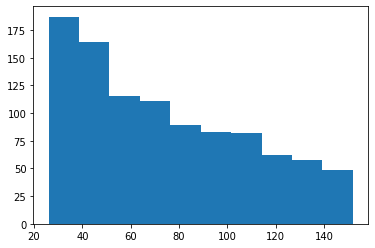

In [6]:
print(len(word_freq_list))
import matplotlib.pyplot as plt
plt.hist([item[1] for item in word_freq_list[4000:5000]])

In [26]:
feature_words = {word_freq_list[i+2000][0]:i for i in range(2000)}

In [27]:
# use a feature vector whose len = 100, use %100 to map 1000 index to 100 buckets
label_features = np.zeros([14, 100])
label_count = [0] * 14
for idx, row in train_data.iterrows():
    label = row['label']
    label_count[label] += 1
    
    text = map(int, row['text'].split())
    for word in text:
        if word in feature_words:
            word_idx = feature_words[word] % 100
            label_features[label][word_idx] += 1

In [28]:
normalized_label_features = np.zeros([14, 100])
for i in range(14):
    v_len = (np.array(label_features[i]).dot(np.array(label_features[i]))) ** 0.5
    for j in range(100):
        normalized_label_features[i][j] = label_features[i][j]/v_len

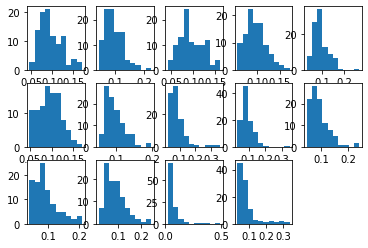

In [29]:
for i in range(14):
    plt.subplot(3, 5, i+1)
    plt.hist(normalized_label_features[i])

In [30]:
normalized_label_features[0].dot(normalized_label_features.T)

array([1.        , 0.90987497, 0.90230696, 0.93399695, 0.8852186 ,
       0.90481133, 0.92653133, 0.82366749, 0.88234864, 0.91685801,
       0.88937142, 0.84532016, 0.67804287, 0.76812382])

In [31]:
def predict(text):
    feature = [0] * 100
    for w in map(int, text.split()):
        if w in feature_words:
            feature[feature_words[w] % 100] += 1
    print(normalized_label_features.dot(np.array(feature)))
    return np.argmax(normalized_label_features.dot(np.array(feature)))

In [32]:
test_samples = test_data.sample(frac=0.01)
test_samples['res'] = test_samples['text'].apply(predict)

[4.10912072 4.72137734 3.25271081 3.05970385 2.95907574 3.49853645
 2.98963713 4.05745875 3.62604795 2.92164625 3.87868983 2.93973031
 1.59355629 2.14534765]
[0.63826181 0.42758309 0.42959633 0.57086339 0.40798644 0.34472934
 0.54699799 0.25637549 0.35748779 0.511273   0.44338511 0.48100708
 0.16610763 0.44436488]
[0.25085718 0.26784646 0.28298806 0.2594178  0.22952906 0.33573756
 0.4015135  0.16858763 0.23699813 0.22955361 0.42255494 0.22438434
 0.63791959 0.20593738]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.17549008 0.12489443 0.20266671 0.21713855 0.17288058 0.24414846
 0.16433628 0.16760493 0.24976137 0.18439156 0.14078965 0.19073311
 0.14083939 0.15945151]
[1.74394151 2.29298448 2.2191846  1.99949083 1.75478196 2.19994342
 1.68057284 1.64274669 1.72748686 2.07974843 2.46372593 1.78582708
 4.733032   1.21912929]
[0.30434122 0.3451688  0.23118489 0.21420064 0.26504443 0.29809912
 0.211219   0.23355501 0.38196042 0.35067    0.39149567 0.55177741
 0.11474268 0.66129891]
[0.14087

In [34]:
test_samples.head()

,label,text,res
32110,1,2107 2923 913 885 6357 7539 6469 1647 4612 173...,1
14692,1,5788 2164 2539 3764 6822 3659 5602 4230 1970 2...,0
27730,12,5698 5282 5624 167 3231 314 4261 1667 2376 446...,12
24310,1,239 4068 1622 1129 2490 3634 5036 2549 1247 70...,0
144018,7,1348 3017 4399 3961 5573 4516 5602 6835 5296 1...,8


In [36]:
sum(test_samples['label'] == test_samples['res'])/len(test_samples)

0.175